# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Muhammad Naufal Ilman
- **Email:** mnaufalilman@gmail.com
- **ID Dicoding:** nopal_ilman

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara kondisi cuaca (temperatur, tekanan udara, kelembaban) dengan tingkat polusi udara?
- Apakah ada perbedaan kualitas udara di berbagai stasiun pemantauan?

## Import Semua Packages/Library yang Digunakan

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [23]:
folder_path = "Data"  # Ganti dengan path folder CSV kamu

# Ambil semua file CSV dalam folder
all_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Gabungkan semua file CSV menjadi satu DataFrame
df_list = [pd.read_csv(os.path.join(folder_path, file)) for file in all_files]
df_AirQuality = pd.concat(df_list, ignore_index=True)

df_AirQuality.to_csv("Air_Quality_Total.csv", index=False)
df_AirQuality.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [24]:
df_AirQuality = df_AirQuality.drop(['No'], axis=1)

### Assessing Data

**1. Melakukan pengecekan tipe data apakah tipe data sudah benar atau tidak**

In [25]:
# Cek tipe data
df_AirQuality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    412029 non-null  float64
 5   PM10     414319 non-null  float64
 6   SO2      411747 non-null  float64
 7   NO2      408652 non-null  float64
 8   CO       400067 non-null  float64
 9   O3       407491 non-null  float64
 10  TEMP     420370 non-null  float64
 11  PRES     420375 non-null  float64
 12  DEWP     420365 non-null  float64
 13  RAIN     420378 non-null  float64
 14  wd       418946 non-null  object 
 15  WSPM     420450 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 54.6+ MB


**Insight:**
- terlihat bahwa tipe variabel month dan wd tidak sesuai dengan yang saya inginkan yaitu category

**2. Cek Duplikasi data**

In [26]:
print("Jumlah duplikasi: ", df_AirQuality.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- tidak terdapat duplikasi pada data


### Cleaning Data

In [27]:
# Cek Missing Value
total_missing = df_AirQuality.isnull().sum().sum() # Total missing value

percent_missing = (total_missing / df_AirQuality.size) * 100 # Persentase missing value

print(f"Total missing values: {total_missing}")
print(f"Percentage of missing values: {percent_missing:.2f}%")

Total missing values: 74027
Percentage of missing values: 1.03%


**Insight:**
- Terdapat Missing value yag berjumlah 0.98% dari data asli atau 74027 dari 420768

In [28]:
# Hapus Missing Value
df_AirQuality.dropna(inplace=True)

In [29]:
# Mengubah isi variabel month menjadi (1:Januari, 2:Februari, 3:Maret, 4:April, 5:Mei, 6:Juni, 7:Juli, 8:Agustus, 9:September, 10:Oktober, 11:Nopember, 12:Desember
# Mengubah isi wd menjadi (N:North, NNE:North - North East, NE:North East, ENE: East - North East, E:East, ESE:East - South East, SE:South East, SSE:South - South East, S:South, SSW:South - South West, SW:South West, WSW:West - South West, W:West, WNW:West - North West, NW:North West, NNW:North - North West)
df_AirQuality['month'] = df_AirQuality['month'].replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})
df_AirQuality['wd'] = df_AirQuality['wd'].replace({'N': 'North', 'NNE': 'North - North East', 'NE': 'North East', 'ENE': 'East - North East', 'E':'East', 'ESE': 'East - South East', 'SE': 'South East', 'SSE': 'South - South East', 'S': 'South', 'SSW': 'South - South West', 'SW': 'South West', 'WSW': 'West - South West', 'W': 'West', 'WNW': 'West - North West', 'NW': 'North West', 'NNW': 'North - North West'})

In [30]:
df_AirQuality.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,March,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,North - North West,4.4,Aotizhongxin
1,2013,March,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,North,4.7,Aotizhongxin
2,2013,March,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,North - North West,5.6,Aotizhongxin
3,2013,March,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,North West,3.1,Aotizhongxin
4,2013,March,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,North,2.0,Aotizhongxin


In [31]:
# Mengubah tipe data month, wd, dan station ke category
df_AirQuality['month'] = df_AirQuality['month'].astype('category')
df_AirQuality['wd'] = df_AirQuality['wd'].astype('category')
df_AirQuality['station'] = df_AirQuality['station'].astype('category')

In [32]:
# Kolom numerik
numerical_cols = [col for col in df_AirQuality.columns if df_AirQuality[col].dtype in ['int64', 'float64']]

# Kolom kategorikal
categorical_cols = [col for col in df_AirQuality.columns if df_AirQuality[col].dtype == 'category']

# Daftar Variabel
total_features = len(categorical_cols) + len(numerical_cols)
num_numerical_features = len(numerical_cols)
num_categorical_features = len(categorical_cols)

print(f"Number of features: {total_features}")
print(f"Number of numerical features: {num_numerical_features}")
print(f"Number of categorical features: {num_categorical_features}\n")
print(f"List of categorical features:\n{categorical_cols}\n")
print(f"List of numerical features:\n{numerical_cols}")

Number of features: 17
Number of numerical features: 14
Number of categorical features: 3

List of categorical features:
['month', 'wd', 'station']

List of numerical features:
['year', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


In [33]:
# Menampilkan semua nilai unik dengan set()
for col in categorical_cols:
    print(f"Kolom: {col}")
    print(set(df_AirQuality[col].unique()))
    print("-" * 30)

Kolom: month
{'August', 'February', 'December', 'May', 'June', 'November', 'January', 'October', 'September', 'July', 'March', 'April'}
------------------------------
Kolom: wd
{'North - North West', 'North', 'West - South West', 'South - South West', 'West - North West', 'West', 'North West', 'South - South East', 'North - North East', 'South West', 'North East', 'East', 'South', 'East - South East', 'South East', 'East - North East'}
------------------------------
Kolom: station
{'Dingling', 'Wanshouxigong', 'Dongsi', 'Nongzhanguan', 'Guanyuan', 'Huairou', 'Aotizhongxin', 'Tiantan', 'Gucheng', 'Wanliu', 'Shunyi', 'Changping'}
------------------------------


In [34]:
#cek tipe data
df_AirQuality.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382168 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype   
---  ------   --------------   -----   
 0   year     382168 non-null  int64   
 1   month    382168 non-null  category
 2   day      382168 non-null  int64   
 3   hour     382168 non-null  int64   
 4   PM2.5    382168 non-null  float64 
 5   PM10     382168 non-null  float64 
 6   SO2      382168 non-null  float64 
 7   NO2      382168 non-null  float64 
 8   CO       382168 non-null  float64 
 9   O3       382168 non-null  float64 
 10  TEMP     382168 non-null  float64 
 11  PRES     382168 non-null  float64 
 12  DEWP     382168 non-null  float64 
 13  RAIN     382168 non-null  float64 
 14  wd       382168 non-null  category
 15  WSPM     382168 non-null  float64 
 16  station  382168 non-null  category
dtypes: category(3), float64(11), int64(3)
memory usage: 44.8 MB


## Exploratory Data Analysis (EDA)

In [35]:
#statistika deskriptif secara keseluruhan
df_AirQuality.describe(include="all")

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,382168.000000,382168,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168,382168.000000,382168
unique,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,March,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North East,NaN,Nongzhanguan
freq,NaN,33536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39319,NaN,33114
mean,2014.714905,NaN,15.711308,11.575184,79.432383,104.573837,15.634814,50.570068,1229.940563,57.376676,13.518694,1010.813471,2.417195,0.065030,NaN,1.738031,NaN
std,1.160266,NaN,8.803064,6.933552,80.154901,91.379446,21.306103,35.062086,1157.151476,56.709013,11.425355,10.452381,13.798402,0.823901,NaN,1.241152,NaN
min,2013.000000,NaN,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,NaN,0.000000,NaN
25%,2014.000000,NaN,8.000000,6.000000,20.000000,36.000000,2.000000,23.000000,500.000000,10.495800,3.100000,1002.400000,-9.000000,0.000000,NaN,0.900000,NaN
50%,2015.000000,NaN,16.000000,12.000000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.400000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN
75%,2016.000000,NaN,23.000000,18.000000,111.000000,145.000000,19.000000,71.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


In [36]:
# Category Data
df_AirQuality[categorical_cols].describe().T

,count,unique,top,freq
month,382168,12,March,33536
wd,382168,16,North East,39319
station,382168,12,Nongzhanguan,33114


**Insight:**
- Stasiun Nongzhanguan merupakan lokasi pemantauan yang paling aktif atau memiliki data yang lebih lengkap dibandingkan stasiun lainnya.
- Bulan Maret merupakan bulan yang dimana paling sering dilakukan pemantauan dengan 33.536 entri data tercatat dalam dataset

In [37]:
# Numeric Data
df_AirQuality[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
year,382168.0,2014.714905,1.160266,2013.0000,2014.0000,2015.0,2016.0,2017.0
day,382168.0,15.711308,8.803064,1.0000,8.0000,16.0,23.0,31.0
hour,382168.0,11.575184,6.933552,0.0000,6.0000,12.0,18.0,23.0
PM2.5,382168.0,79.432383,80.154901,2.0000,20.0000,55.0,111.0,844.0
PM10,382168.0,104.573837,91.379446,2.0000,36.0000,82.0,145.0,999.0
SO2,382168.0,15.634814,21.306103,0.2856,2.0000,7.0,19.0,500.0
NO2,382168.0,50.570068,35.062086,2.0000,23.0000,43.0,71.0,290.0
CO,382168.0,1229.940563,1157.151476,100.0000,500.0000,900.0,1500.0,10000.0
O3,382168.0,57.376676,56.709013,0.2142,10.4958,45.0,82.0,1071.0
TEMP,382168.0,13.518694,11.425355,-19.9000,3.1000,14.4,23.2,41.6


**Insight:**
- Polusi udara cukup tinggi, terutama untuk PM2.5, PM10, dan CO, dengan beberapa kejadian polusi ekstrem.
- Suhu rata-rata sekitar 13.5°C, tetapi rentangnya sangat luas, mencerminkan musim yang berbeda dalam data.
- Tekanan udara relatif stabil di sekitar 1010 hPa.
- Curah hujan sangat rendah dalam sebagian besar pengamatan, meskipun ada kejadian hujan ekstrem.
- Kecepatan angin umumnya rendah tetapi bisa mencapai kecepatan tinggi dalam beberapa kesempatan.


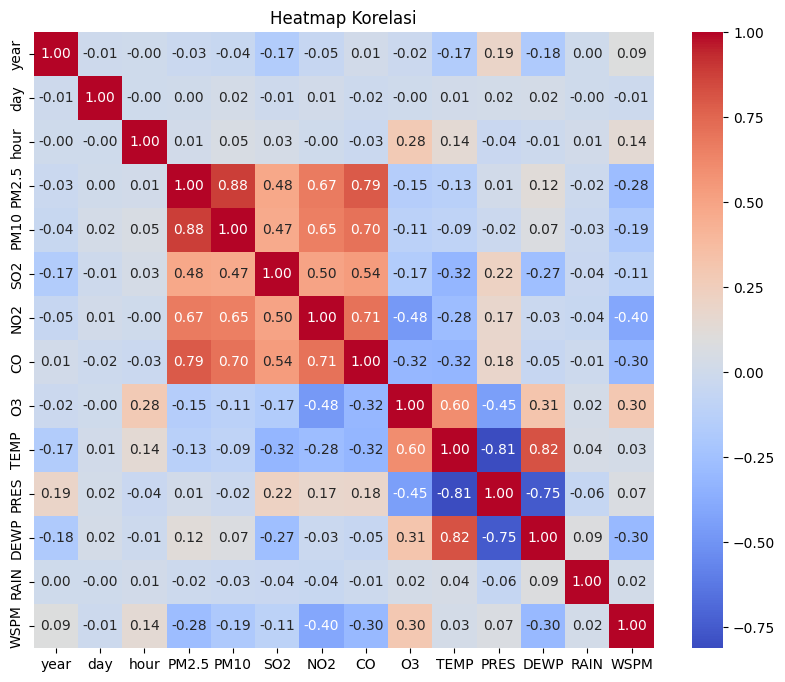

In [38]:
# Menghitung matriks korelasi
correlation_matrix = df_AirQuality[numerical_cols].corr()

# Visualisasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Heatmap Korelasi")
plt.show()

**Insight:**
- Polutan utama (PM2.5, PM10, NO2, CO) memiliki hubungan positif yang kuat satu sama lain, menunjukkan bahwa mereka sering berasal dari sumber yang sama.
- Temperatur berbanding terbalik dengan tekanan udara dan polutan partikulat, tetapi berkorelasi positif dengan ozon.
- Kecepatan angin berperan dalam menyebarkan polusi, sehingga semakin tinggi kecepatan angin, semakin rendah konsentrasi polutan.
- Tekanan udara tinggi dikaitkan dengan suhu lebih rendah dan kadar ozon yang lebih rendah.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hubungan antara kondisi cuaca (temperatur, tekanan udara, kelembaban) dengan tingkat polusi udara?

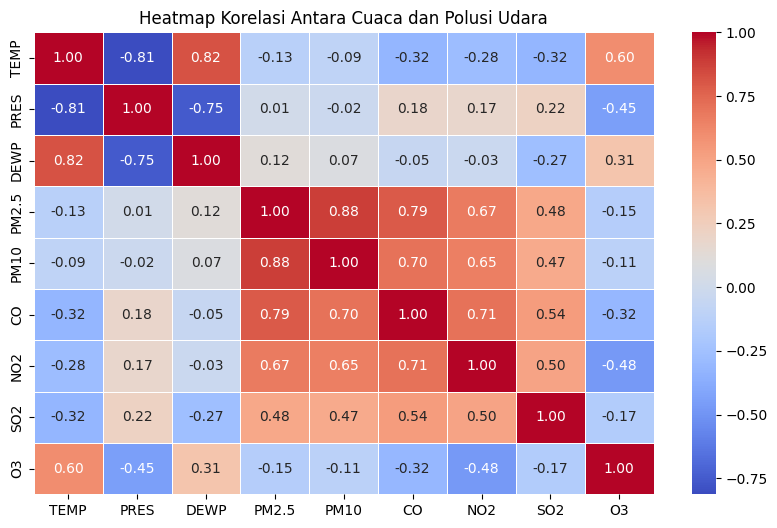

In [39]:
# Memilih hanya kolom yang relevan untuk korelasi
selected_columns = ["TEMP", "PRES", "DEWP", "PM2.5", "PM10", "CO", "NO2", "SO2", "O3"]
df_corr = df_AirQuality[selected_columns].corr()

# Membuat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Judul
plt.title("Heatmap Korelasi Antara Cuaca dan Polusi Udara")
plt.show()

Berdasarkan heatmap korelasi diatas didapati bahwa:
- Temperatur (TEMP) memiliki hubungan negatif dengan polutan seperti PM2.5, PM10, NO2, SO2, dan CO, yang berarti saat suhu meningkat, tingkat polusi udara cenderung menurun. Namun, Ozon (O3) justru meningkat saat suhu lebih tinggi.

- Tekanan Udara (PRES) tidak menunjukkan hubungan kuat dengan polutan, sehingga tekanan udara tidak terlalu berpengaruh terhadap tingkat polusi.

- Dew Point (DEWP) (indikator kelembaban udara) memiliki korelasi lemah dengan PM2.5 dan PM10, yang menunjukkan bahwa kelembaban udara tidak memiliki dampak signifikan terhadap polusi udara.

- Polutan seperti PM2.5, PM10, NO2, CO, dan SO2 memiliki hubungan positif satu sama lain, yang menunjukkan bahwa jika satu jenis polutan meningkat, maka polutan lainnya cenderung ikut meningkat.

**Kesimpulan:**
- Suhu tinggi cenderung mengurangi polusi udara kecuali Ozon (O3), yang meningkat saat suhu tinggi.

- Tekanan udara dan kelembaban tidak berpengaruh signifikan terhadap polusi.

- Polutan seperti PM2.5, PM10, NO2, CO, dan SO2 sering meningkat bersamaan, menunjukkan bahwa sumber pencemarannya kemungkinan berasal dari aktivitas yang sama.

### Pertanyaan 2: Apakah ada perbedaan kualitas udara di berbagai stasiun pemantauan?

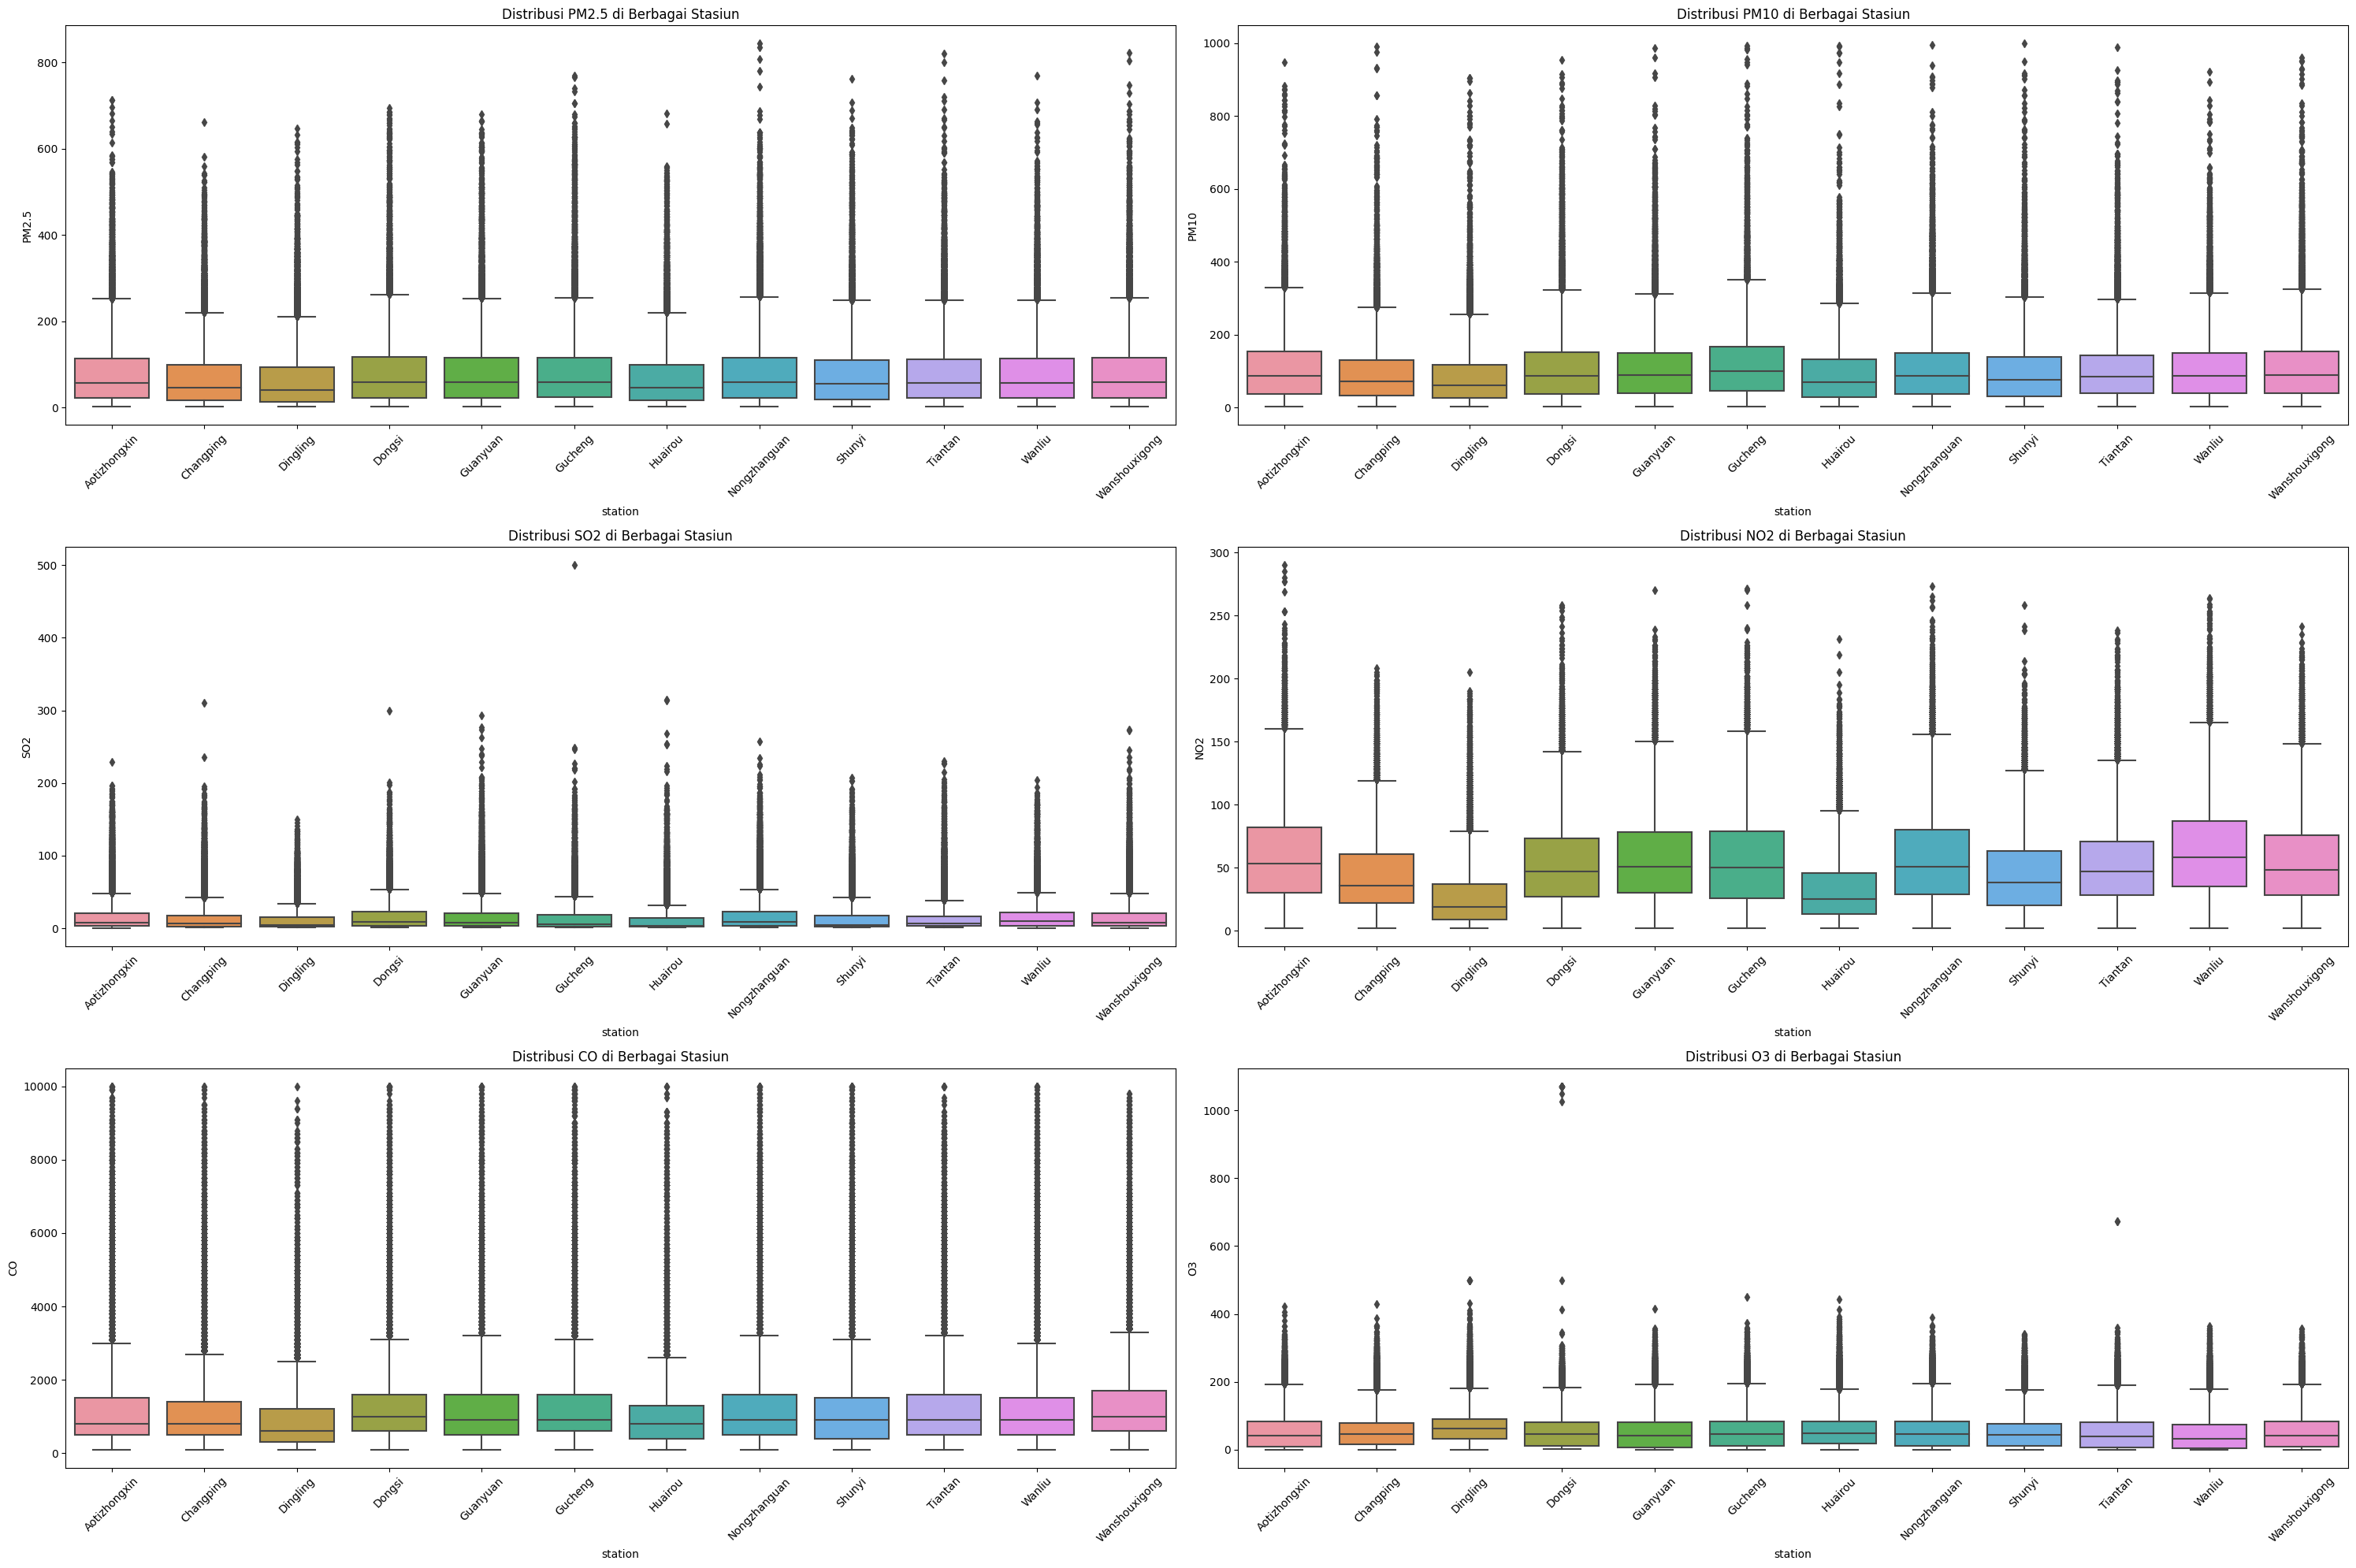

In [48]:
# Kolom polutan dan stasiun
polutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
plt.figure(figsize=(30, 20))

# Buat subplot untuk setiap polutan
for i, polutan in enumerate(polutants, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x="station", y=polutan, data=df_AirQuality)
    plt.xticks(rotation=45)
    plt.title(f"Distribusi {polutan} di Berbagai Stasiun")

plt.tight_layout()
plt.show()

**Insight:**
- Terdapat perbedaan distribusi polutan di setiap stasiun, yang terlihat dari variasi tinggi boxplot.
- Beberapa stasiun memiliki median yang lebih tinggi, menandakan tingkat polusi yang lebih buruk dibandingkan yang lain.
- PM2.5 dan PM10 memiliki distribusi yang cukup seragam di semua stasiun
- NO2 dan CO tampak memiliki variasi yang lebih jelas antar stasiun, dengan beberapa lokasi menunjukkan median yang lebih tinggi.
- SO2 dan O3 menunjukkan perbedaan antar stasiun, tetapi lebih sedikit dibandingkan polutan lain.

**Kesimpulan:**
-  **terdapat perbedaan kualitas udara antar stasiun pemantauan**. Beberapa stasiun memiliki tingkat polusi yang lebih tinggi dibandingkan yang lain, terutama terlihat dari nilai median dan distribusi data dalam boxplot.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2